In [2]:
import matplotlib
%matplotlib inline

import matplotlib.pyplot as plt
import imageio

In [3]:
import os, argparse
import cv2
import spacy
import numpy as np
import pandas as pd

In [8]:
from keras.models import model_from_json
from keras.optimizers import SGD
import keras
from sklearn.externals import joblib

# load the models and weights file

In [9]:
VQA_model_file_name = 'files_all/VQA_MODEL.json'
VQA_weights_file_name = 'files_all/VQA_MODEL_WEIGHTS.hdf5'
label_encoder_file_name = 'files_all/FULL_labelencoder_trainval.pkl'
CNN_weights_file_name = 'models/imageTrain_weights.h5'

print (os.stat(CNN_weights_file_name).st_size == 0)


False


In [9]:
df = pd.read_json("files_all/VQA_MODEL.json", encoding ="utf-8")
#print(len(df))
print df['config'].head(12)

0     {u'class_name': u'Merge', u'config': {u'layers...
1     {u'class_name': u'Dense', u'config': {u'W_cons...
2     {u'class_name': u'Activation', u'config': {u'a...
3     {u'class_name': u'Dropout', u'config': {u'p': ...
4     {u'class_name': u'Dense', u'config': {u'W_cons...
5     {u'class_name': u'Activation', u'config': {u'a...
6     {u'class_name': u'Dropout', u'config': {u'p': ...
7     {u'class_name': u'Dense', u'config': {u'W_cons...
8     {u'class_name': u'Activation', u'config': {u'a...
9     {u'class_name': u'Dropout', u'config': {u'p': ...
10    {u'class_name': u'Dense', u'config': {u'W_cons...
11    {u'class_name': u'Activation', u'config': {u'a...
Name: config, dtype: object


# compile the model

In [10]:
def get_image_model(CNN_weights_file_name):
    from models.CNN_training import image_Train
    image_model = image_Train(CNN_weights_file_name)
    
    sgd = SGD(lr = 0.1,
              decay = 1e-6,
              momentum = 0.9,
              nesterov = True)
    
    image_model.compile(optimizer = sgd,
                       loss = 'categorical_crossentropy')
    print image_model.summary()
    return image_model
    

# image features

In [11]:
import io, os, sys, types

In [12]:
from IPython import get_ipython
from nbformat import read
from IPython.core.interactiveshell import InteractiveShell

In [1]:
def get_image_features(image_file_name, CNN_weights_file_name):
    image_features = np.zeros((1,4096))
    
    im = cv2.resize(cv2.imread(image_file_name), (224, 224))
    #im = im.transpose((2,0,1))
    
    mean_pixel = [103.939, 116.779, 123.68]
    
    im = im.astype(np.float32, copy=False)
    
    for c in range(3):
        im[:, :, c] = im[: ,: ,c] - mean_pixel[c]
        
    im = im.transpose((2,0,1))
    
    im = np.expand_dims(im, axis=0)
    
    image_features[0,:] = get_image_model(CNN_weights_file_name).predict(im)[0]
    cat = np.squeeze(image_features[0,:],axis=0)
    print cat.shape
    plt.imshow(cat)
    
    return image_features

# word embeddings

In [2]:
def get_question_features(question):
    word_embeddings = spacy.load('en', vectors= 'en_glove_cc_300_1m_vectors')
    tokens = word_embeddings(question)
    question_tensor = np.zeros((1, 30, 300))
    
    for j in xrange(len(tokens)):
        question_tensor[0, j, :] = tokens[j].vector[:300]
        
    return question_tensor


## try the embeddings

In [23]:
#word_emdeddings = spacy.load('en', vectors= 'en_glove_cc_300_1m_vectors')
word_embeddings = spacy.load('en', vectors= 'en_glove_cc_300_1m_vectors')

IOError: [Errno 2] No such file or directory

In [12]:
'''
obama = word_embeddings(u"obama")
putin = word_embeddings(u"putin")
trump = word_embeddings(u"trump")
banana = word_embeddings(u"banana")
monkey = word_embeddings(u"monkey")
'''

'\nobama = word_embeddings(u"obama")\nputin = word_embeddings(u"putin")\ntrump = word_embeddings(u"trump")\nbanana = word_embeddings(u"banana")\nmonkey = word_embeddings(u"monkey")\n'

In [13]:

#obama.similarity(putin)

In [14]:
#putin.similarity(obama)

In [15]:
#obama.similarity(trump)

In [16]:
#trump.similarity(obama)

In [17]:
#trump.similarity(putin)

In [18]:
#queen = word_embeddings(u"queen")
#king = word_embeddings(u"king")

#queen.sentiment(king)

# vqa model

In [19]:
def get_VQA_model(VQA_model_file_name):
    from files_all.VQA import VQA_MODEL
    vqa_model = VQA_MODEL()
    #vqa_model = model_from_json(open(VQA_model_file_name).read())
    vqa_model.load_weights(VQA_weights_file_name)
    vqa_model.compile(loss='categorical_crossentropy', optimizer='rmsprop')
    
    print vqa_model.summary()
    
    return vqa_model

In [3]:
#from keras.utils.vis_utils import plot_model
#model_vqa = get_VQA_model(VQA_model_file_name, VQA_weights_file_name)
#plot_model(model_vqa, to_file='model_vqa.png')

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
model_vqa = get_VQA_model(VQA_model_file_name)
#SVG(model_to_dot(model_vqa).create(prog='dot', format='svg'))


/home/nishu/kerai/local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


NameError: name 'get_VQA_model' is not defined

# ask question

In [14]:
image_file_name = "indparksoccerkids.jpg"
#question = u"What vehicle is in the picture?"
#question = u"Are they playing soccer?"
#question = u"Are there any trees?"
#question = u"Are there bushes?"
#question = u"Are there any boys?"
question = u"How many boys are there?"

In [2]:
#get img features
image_features = get_image_features(image_file_name, CNN_weights_file_name)

NameError: name 'image_file_name' is not defined

In [ ]:
def nice_cat_printer(model, img):
    img_batch = np.expand_dims(cat,axis=0)
    conv_img = model.predict(img_batch)
    
    conv_img=np.sequeeze(conv_img,axis=0)
    print conv_img.shape

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
model_image = get_image_model(CNN_weights_file_name)
#SVG(model_to_dot(model_image).create(prog='dot', format='svg'))


In [22]:
#get question features
question_features = get_question_features(question)

IOError: [Errno 2] No such file or directory

In [25]:
#vqa model
vqa_model = get_VQA_model(VQA_weights_file_name)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
merge_2 (Merge)              (None, 4608)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 1024)              4719616   
_________________________________________________________________
activation_5 (Activation)    (None, 1024)              0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
activation_6 (Activation)    (None, 1024)              0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 1024)              0         
__________

How many boys are there?


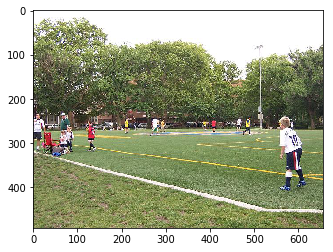

In [26]:
plt.imshow(imageio.imread(image_file_name))
print(question)

In [28]:
y_output = vqa_model.predict([question_features, image_features])
y_sort_index = np.argsort(y_output)

'''
labelencoder = joblib.load(label_encoder_file_name)
for label in reversed(np.argsort(y_output)[0,-5:]):
    print str(round(y_output[0,label]*100,2)).zfill(5), "% ", labelencoder.inverse_transform(label)
'''
labelencoder = joblib.load(label_encoder_file_name)
top5_ans = np.argsort(y_output)[0][::-1][:5]
for i, a in enumerate (top5_ans, 1):
    print("%d best top answer: %s with probability: %.02f " %(i, labelencoder.inverse_transform(a), 100 * y_output[0][a]))

1 best top answer: 2 with probability: 11.46 
2 best top answer: 10 with probability: 6.92 
3 best top answer: 5 with probability: 6.34 
4 best top answer: 12 with probability: 6.16 
5 best top answer: 7 with probability: 6.01 


/mnt/c/Users/Srishti/ubuntuProjects/venv/local/lib/python2.7/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator LabelEncoder from version pre-0.18 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/mnt/c/Users/Srishti/ubuntuProjects/venv/lib/python2.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: The file 'files_all/FULL_labelencoder_trainval.pkl' has been generated with a joblib version less than 0.10. Please regenerate this pickle file.
  if __name__ == '__main__':
/mnt/c/Users/Srishti/ubuntuProjects/venv/local/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/mnt/c/Users/Srishti/ubuntuProjects/venv/local/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: De

In [ ]:

'''
from models.CNN_training import image_Train
image_model = image_Train(CNN_weights_file_name)

'''